# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/89.2 MB ? eta -:--:--
     ---------------------------------------- 0.2/89.2 MB 6.9 MB/s eta 0:00:13
      --------------------------------------- 1.9/89.2 MB 20.5 MB/s eta 0:00:05
     --- ------------------------------------ 7.1/89.2 MB 50.5 MB/s eta 0:00:02
     ---- --------------------------------- 11.6/89.2 MB 108.8 MB/s eta 0:00:01
     ------ ------------------------------- 15.5/89.2 MB 131.2 MB/s eta 0:00:01
     --------- ---------------------------- 21.4/89.2 MB 131.2 MB/s eta 0:00:01
     ----------- -------------------------- 26.3/89.2 MB 108.8 MB/s eta 0:00:01
     ------------- ------------------------ 31.6/89.2 MB 110.0 MB/s eta 0:00:01
     --------------- ---------------------- 36.9/89.2 MB 110.0 MB/s eta 0:00:01
     ------------------ ------------------- 42.6/89.2 MB 108.8 MB/s eta 0:00:01
     -------------------- ----------------- 47.5/89.2 MB

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [254 lines of output]
      Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com, https://pypi.ngc.nvidia.com
      Ignoring numpy: markers 'python_version == "3.6" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.6" and sys_platform == "linux" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version >= "3.6" and sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match yo

In [2]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

c:\Users\Disenio\Documents\AIWork\text-generation-webui\installer_files\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU available
Dataset already downloaded. If you need to re-download, please delete the directory landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [3]:
!pytest -vv src/transfer.py

============================= test session starts =============================
platform win32 -- Python 3.13.3, pytest-8.4.1, pluggy-1.6.0 -- C:\Users\Disenio\AppData\Local\Programs\Python\Python313\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\Disenio\Documents\AIWork\starter-kit
plugins: anyio-4.9.0, langsmith-0.4.13, asyncio-1.1.0, mock-3.14.1
asyncio: mode=Mode.STRICT, asyncio_default_fixture_loop_scope=None, asyncio_default_test_loop_scope=function
collecting ... collected 1 item

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== warnings summary ===============================
src/transfer.py::test_get_model_transfer_learning
  C:\Users\Disenio\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
    warnings.warn(

src/transfer.py::test_get_mode

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [4]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

In [5]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=True
)

c:\Users\Disenio\Documents\AIWork\text-generation-webui\installer_files\env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Disenio\Documents\AIWork\text-generation-webui\installer_files\env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2697, 0.2706, 0.3017])


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.46it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  6.19it/s]



Epoch: 1 	Training Loss: 3.455630 	Validation Loss: 2.681993
New minimum validation loss: 2.681993. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.49it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.94it/s]



Epoch: 2 	Training Loss: 2.507160 	Validation Loss: 2.034357
New minimum validation loss: 2.034357. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.51it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.75it/s]



Epoch: 3 	Training Loss: 2.038046 	Validation Loss: 1.720117
New minimum validation loss: 1.720117. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.97it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.85it/s]



Epoch: 4 	Training Loss: 1.799651 	Validation Loss: 1.621995
New minimum validation loss: 1.621995. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.90it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.89it/s]



Epoch: 5 	Training Loss: 1.632318 	Validation Loss: 1.476403
New minimum validation loss: 1.476403. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.60it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.48it/s]



Epoch: 6 	Training Loss: 1.529262 	Validation Loss: 1.494123


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.36it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.90it/s]



Epoch: 7 	Training Loss: 1.473946 	Validation Loss: 1.421318
New minimum validation loss: 1.421318. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.50it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.96it/s]



Epoch: 8 	Training Loss: 1.380471 	Validation Loss: 1.391759
New minimum validation loss: 1.391759. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.75it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.58it/s]



Epoch: 9 	Training Loss: 1.333846 	Validation Loss: 1.343792
New minimum validation loss: 1.343792. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.48it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.72it/s]



Epoch: 10 	Training Loss: 1.297080 	Validation Loss: 1.336641


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.39it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  6.27it/s]



Epoch: 11 	Training Loss: 1.250161 	Validation Loss: 1.334328


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.68it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.78it/s]



Epoch: 12 	Training Loss: 1.213169 	Validation Loss: 1.267466
New minimum validation loss: 1.267466. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 10.61it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.73it/s]



Epoch: 13 	Training Loss: 1.181165 	Validation Loss: 1.312366


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.49it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.88it/s]



Epoch: 14 	Training Loss: 1.137517 	Validation Loss: 1.257239


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.51it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.72it/s]



Epoch: 15 	Training Loss: 1.115670 	Validation Loss: 1.254694
New minimum validation loss: 1.254694. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.40it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.73it/s]



Epoch: 16 	Training Loss: 1.107500 	Validation Loss: 1.281736


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.59it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  6.16it/s]



Epoch: 17 	Training Loss: 1.080679 	Validation Loss: 1.262352


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.50it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.71it/s]



Epoch: 18 	Training Loss: 1.054997 	Validation Loss: 1.262550


Training: 100%|█████████████████████████████████| 63/63 [00:06<00:00,  9.10it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  5.15it/s]



Epoch: 19 	Training Loss: 1.021570 	Validation Loss: 1.264058


Training: 100%|█████████████████████████████████| 63/63 [00:07<00:00,  8.51it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.60it/s]



Epoch: 20 	Training Loss: 1.026980 	Validation Loss: 1.243295


Training: 100%|█████████████████████████████████| 63/63 [00:07<00:00,  7.89it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.47it/s]



Epoch: 21 	Training Loss: 1.011812 	Validation Loss: 1.248561


Training: 100%|█████████████████████████████████| 63/63 [00:08<00:00,  7.79it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  5.20it/s]



Epoch: 22 	Training Loss: 0.992786 	Validation Loss: 1.245945


Training: 100%|█████████████████████████████████| 63/63 [00:08<00:00,  7.78it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.75it/s]



Epoch: 23 	Training Loss: 0.991507 	Validation Loss: 1.227892
New minimum validation loss: 1.227892. Saving model ...


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 10.84it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.58it/s]



Epoch: 24 	Training Loss: 0.967575 	Validation Loss: 1.257811


Training: 100%|█████████████████████████████████| 63/63 [00:08<00:00,  7.50it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.45it/s]



Epoch: 25 	Training Loss: 0.978689 	Validation Loss: 1.270060


Training: 100%|█████████████████████████████████| 63/63 [00:07<00:00,  8.73it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.72it/s]



Epoch: 26 	Training Loss: 0.949718 	Validation Loss: 1.270943


Training: 100%|█████████████████████████████████| 63/63 [00:07<00:00,  8.61it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.74it/s]



Epoch: 27 	Training Loss: 0.964181 	Validation Loss: 1.227736


Training: 100%|█████████████████████████████████| 63/63 [00:07<00:00,  8.20it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.60it/s]



Epoch: 28 	Training Loss: 0.933844 	Validation Loss: 1.225845


Training: 100%|█████████████████████████████████| 63/63 [00:06<00:00,  9.26it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.83it/s]



Epoch: 29 	Training Loss: 0.926515 	Validation Loss: 1.265313


Training: 100%|█████████████████████████████████| 63/63 [00:07<00:00,  8.43it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.63it/s]



Epoch: 30 	Training Loss: 0.930341 	Validation Loss: 1.248966


Training: 100%|█████████████████████████████████| 63/63 [00:07<00:00,  8.07it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.73it/s]



Epoch: 31 	Training Loss: 0.899379 	Validation Loss: 1.246296


Training: 100%|█████████████████████████████████| 63/63 [00:08<00:00,  7.52it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  5.07it/s]



Epoch: 32 	Training Loss: 0.883092 	Validation Loss: 1.256376


Training: 100%|█████████████████████████████████| 63/63 [00:07<00:00,  8.27it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  5.18it/s]



Epoch: 33 	Training Loss: 0.888346 	Validation Loss: 1.258797


Training: 100%|█████████████████████████████████| 63/63 [00:08<00:00,  7.06it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.57it/s]



Epoch: 34 	Training Loss: 0.885239 	Validation Loss: 1.228315


Training: 100%|█████████████████████████████████| 63/63 [00:08<00:00,  7.63it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:03<00:00,  4.75it/s]



Epoch: 35 	Training Loss: 0.866789 	Validation Loss: 1.247856


Training: 100%|█████████████████████████████████| 63/63 [00:07<00:00,  8.28it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  6.06it/s]



Epoch: 36 	Training Loss: 0.832521 	Validation Loss: 1.236128


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.44it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  6.43it/s]



Epoch: 37 	Training Loss: 0.846745 	Validation Loss: 1.229484


Training: 100%|█████████████████████████████████| 63/63 [00:05<00:00, 11.69it/s]

Validating: 100%|███████████████████████████████| 16/16 [00:02<00:00,  5.77it/s]

Epoch: 38 	Training Loss: 0.842628 	Validation Loss: 1.226386
Early stopping at epoch 38. No improvement for 15 epochs.


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ I decided to use ResNet18 for the base of my model, since it performs fairly well on ImageNet and is not too large of a model. Also, since ResNet18 was trained for the ImageNet task, it is a good model to use for this landmark classificaiton task, since both ImageNet and this landmark task use images of natural scenes.

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [6]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 20/20 [00:03<00:00,  6.23it/s]

Test Loss: 1.122786


Test Accuracy: 69% (872/1250)


1.1227856338024138

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [7]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


  0%|                                          | 2/1250 [00:00<03:18,  6.27it/s]code/__torch__/torchvision/transforms/functional.py:188: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
code/__torch__/torchvision/transforms/functional.py:188: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consisten

Accuracy: 0.716


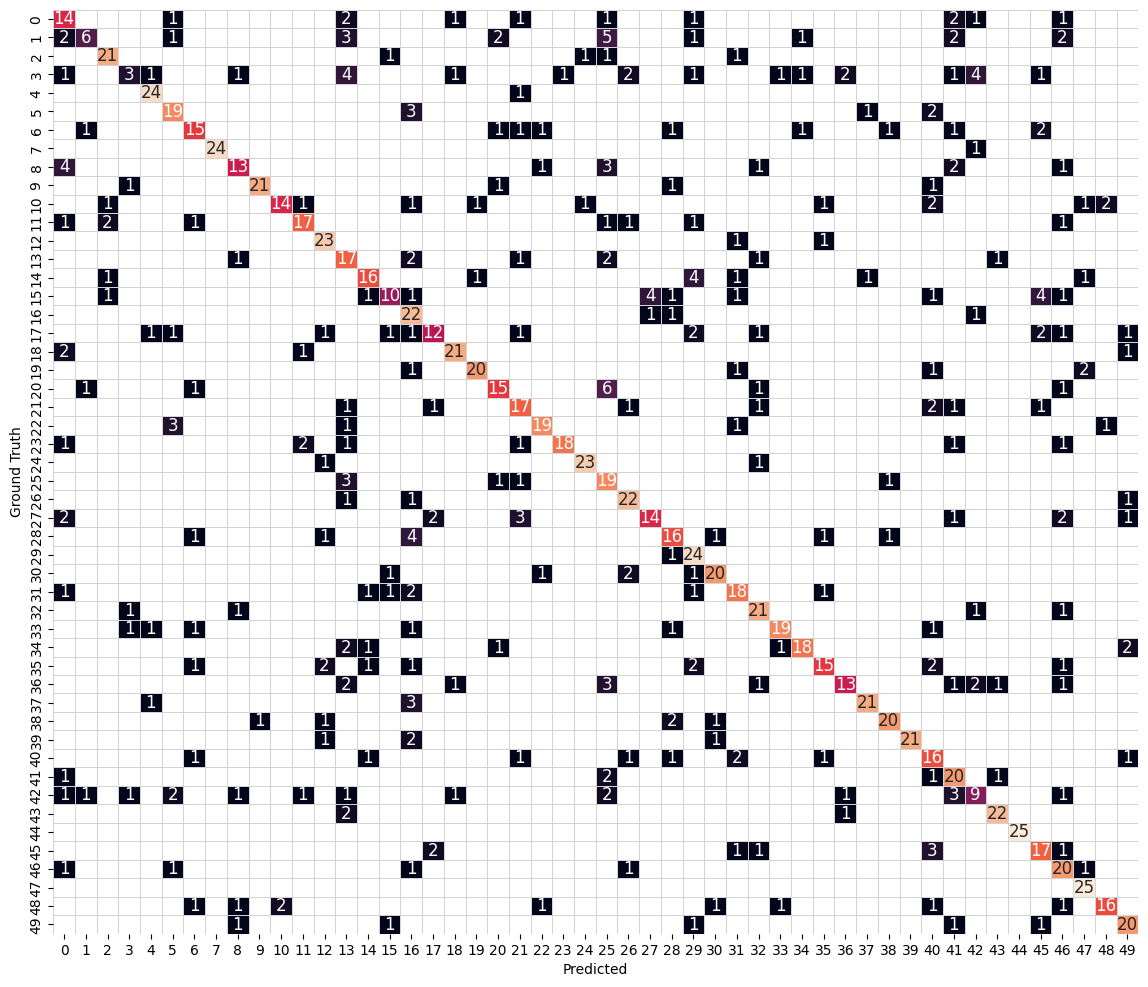

In [8]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)